In [1]:
from gw_eccentricity import load_waveform, load_data, get_available_methods, measure_eccentricity
from gw_eccentricity.load_data import get_available_waveform_origins, get_load_waveform_defaults, get_load_waveform_docs
import matplotlib.pyplot as plt
from gw_eccentricity.plot_settings import use_fancy_plotsettings, labelsDict
import numpy as np
%load_ext autoreload
%autoreload 2

# $EccTD$ $Eccentricity$

In [2]:
get_available_waveform_origins()

['LAL', 'SXSCatalog', 'LVCNR', 'LVCNR_hack', 'EOB', 'EMRI']

In [3]:
get_load_waveform_defaults("LAL")

{'approximant': None,
 'q': None,
 'chi1': None,
 'chi2': None,
 'ecc': None,
 'mean_ano': None,
 'Momega0': None,
 'deltaTOverM': 0.1,
 'physicalUnits': False,
 'M': None,
 'D': None,
 'include_zero_ecc': False}

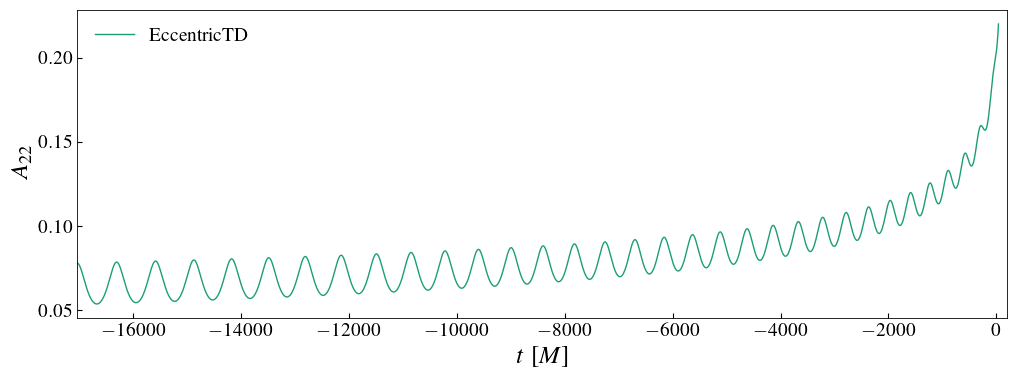

In [33]:

kwargs = {
    "approximant": "EccentricTD",
    "q": 2.0,
    "ecc": 0.120,
    "chi1": [0.0,0.0,0.0],
    "chi2": [0.0,0.0,0.0],
    "mean_ano": 0.0,
    "Momega0": 0.01,
    "include_zero_ecc":True,
}
origin = "LAL"
dataDict = load_waveform(origin, **kwargs)
use_fancy_plotsettings()
plt.figure(figsize=(12,4))
plt.plot(dataDict["t"], np.abs(dataDict["hlm"][(2,2)]),label=kwargs["approximant"])
plt.xlim(dataDict["t"][0], 200)
plt.xlabel(labelsDict["t_dimless"])
plt.ylabel(labelsDict["amp22"])
plt.legend()
#print(dataDict["t"][0])

In [10]:
get_available_methods()

['Amplitude',
 'Frequency',
 'ResidualAmplitude',
 'ResidualFrequency',
 'AmplitudeFits',
 'FrequencyFits']

In [11]:
# Measuring ecc at a ref freq
tref_in = -4000
for method in get_available_methods():
    return_dict = measure_eccentricity(tref_in=tref_in,method=method,dataDict=dataDict)
    
    tref_out = return_dict["tref_out"]
    eccentricity = return_dict["eccentricity"]
    mean_anomaly = return_dict["mean_anomaly"]
    gwecc_object = return_dict["gwecc_object"]
    print(f"method = {method:20s} eccentricity = {eccentricity:.6f}, mean_anomaly={mean_anomaly:.6f}")

method = Amplitude            eccentricity = 0.114230, mean_anomaly=1.849524
method = Frequency            eccentricity = 0.114234, mean_anomaly=1.856243
method = ResidualAmplitude    eccentricity = 0.114325, mean_anomaly=1.878947
method = ResidualFrequency    eccentricity = 0.114325, mean_anomaly=1.879890
method = AmplitudeFits        eccentricity = 0.114324, mean_anomaly=1.876258
method = FrequencyFits        eccentricity = 0.114325, mean_anomaly=1.880292


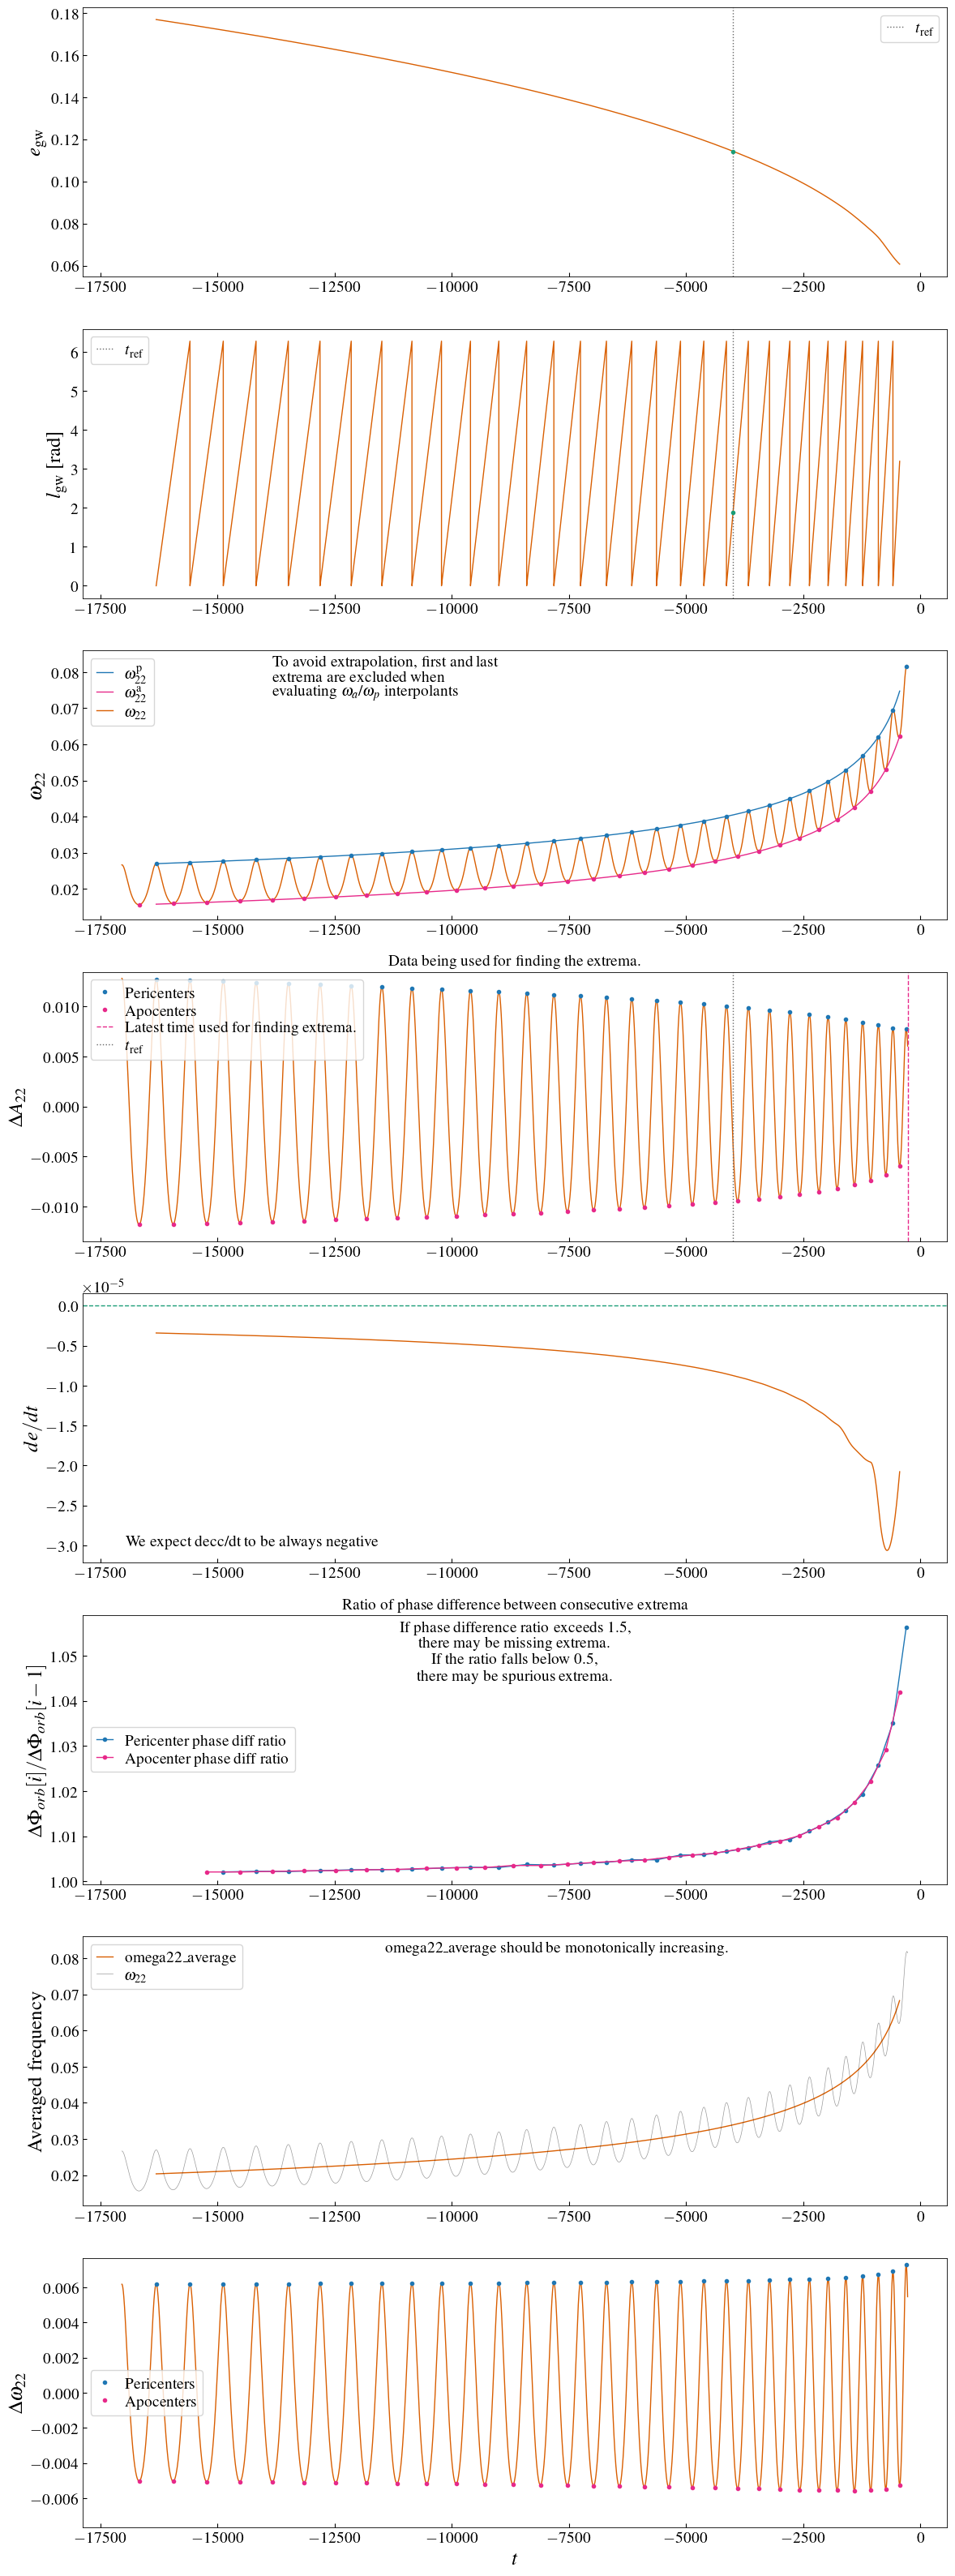

In [12]:
#Diagnostic Plots
method = "ResidualAmplitude"
tref_in=-4000
return_dict = measure_eccentricity(tref_in=tref_in,method=method,dataDict=dataDict)

gwecc_object = return_dict["gwecc_object"]
fig, ax=gwecc_object.make_diagnostic_plots()
plt.savefig('ECC.pdf')

# $NR$ $Eccentricity$

In [13]:
origin = "SXSCatalog"
get_load_waveform_defaults(origin)

#export LAL_DATA_PATH='home/pratul/Downloads/'  #first run this in command line then run jupyter notebook

{'filepath': None,
 'metadata_path': None,
 'deltaTOverM': 0.1,
 'include_zero_ecc': False,
 'include_params_dict': False,
 'zero_ecc_approximant': 'IMRPhenomT',
 'num_orbits_to_remove_as_junk': 2,
 'mode_array': [(2, 2)],
 'extrap_order': 2}

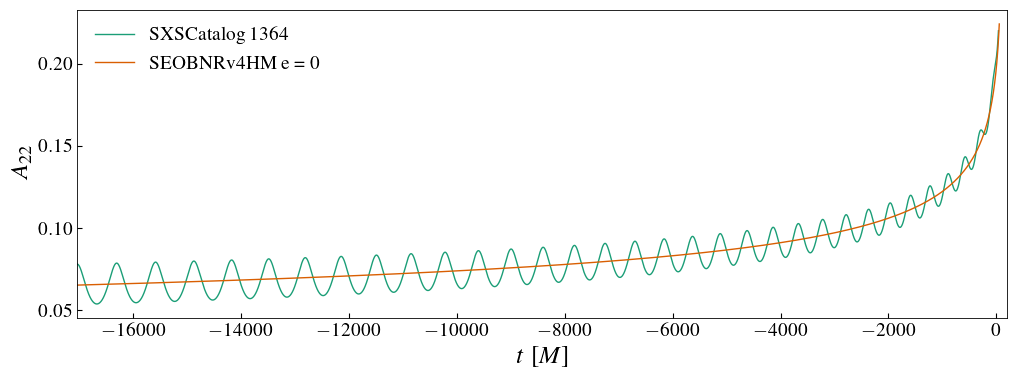

In [14]:
kwargs = {"filepath": '/home/pratul/Downloads/rhOverM_Asymptotic_GeometricUnits_CoM.h5',
         "metadata_path": '/home/pratul/Downloads/metadata.txt',
         "include_zero_ecc":True,
         "zero_ecc_approximant": "SEOBNRv4HM"}

dataDict1 = load_waveform(origin, **kwargs)
plt.figure(figsize=(12,4))
plt.plot(dataDict["t"], np.abs(dataDict["hlm"][(2,2)]),label=origin+' '+str(1364))
plt.plot(dataDict["t_zeroecc"], np.abs(dataDict["hlm_zeroecc"][(2,2)]),label=kwargs["zero_ecc_approximant"] + " e = 0")
plt.xlim(dataDict["t"][0],200)
plt.xlabel(labelsDict["t_dimless"])
plt.ylabel(labelsDict["amp22"])
plt.legend(loc="upper left")

In [15]:
# Measuring ecc at a ref freq
tref_in = -1000
for method in get_available_methods():
    return_dict = measure_eccentricity(tref_in=tref_in,method=method,dataDict=dataDict1)
    
    tref_out = return_dict["tref_out"]
    eccentricity = return_dict["eccentricity"]
    mean_anomaly = return_dict["mean_anomaly"]
    gwecc_object = return_dict["gwecc_object"]
    print(f"method = {method:20s} eccentricity = {eccentricity:.6f}, mean_anomaly={mean_anomaly:.6f}")

method = Amplitude            eccentricity = 0.042917, mean_anomaly=6.029382
method = Frequency            eccentricity = 0.042138, mean_anomaly=5.981805
method = ResidualAmplitude    eccentricity = 0.043787, mean_anomaly=6.189457
method = ResidualFrequency    eccentricity = 0.043791, mean_anomaly=6.213417
method = AmplitudeFits        eccentricity = 0.043784, mean_anomaly=6.183880
method = FrequencyFits        eccentricity = 0.043792, mean_anomaly=6.213417


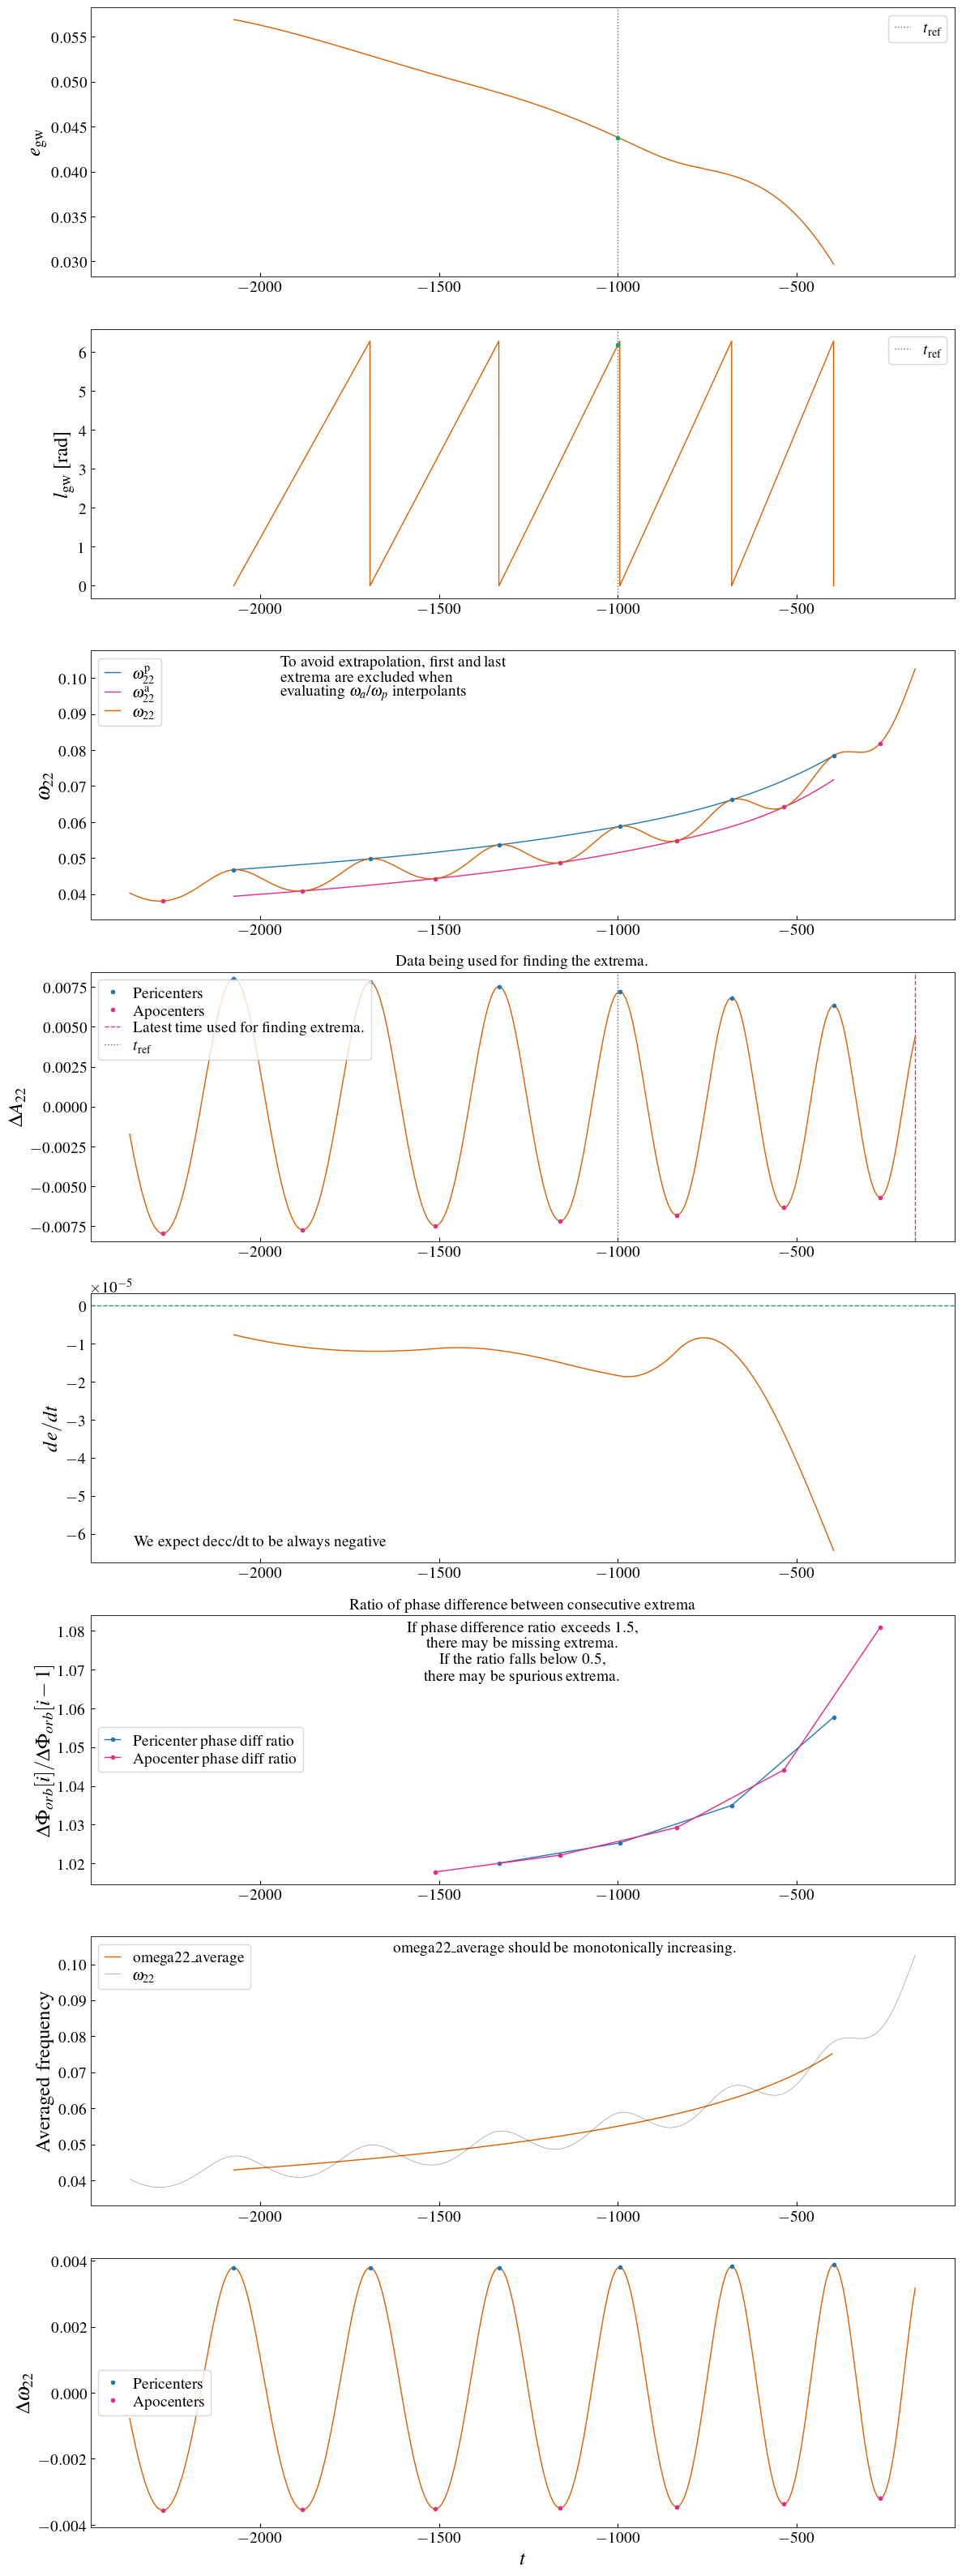

In [16]:
#Diagnostic Plots
method = "ResidualAmplitude"
tref_in=-1000
return_dict = measure_eccentricity(tref_in=tref_in,method=method,dataDict=dataDict1)

gwecc_object = return_dict["gwecc_object"]
fig, ax=gwecc_object.make_diagnostic_plots()
plt.savefig('NR.pdf')

In [17]:
########OLD ecc definition   (COMPARISON WITH LALSIMINSPIRALECCTDEVOLVEORBIT)


In [18]:
import lalsimulation as lalsim
from lal import MSUN_SI, MTSUN_SI, G_SI, PC_SI, C_SI, PI
from ctypes import *
import numpy as np
import matplotlib.pyplot as plt
import math
import lal

In [19]:
#conversion from freq param x to freq in Hz for (2,2) mode
def f(u,mass):
    return math.pow(u,3.0/2.0)/(MTSUN_SI * mass * lal.PI)

In [20]:
#conversion from freq in Hz to freq param
def xconv(f,mass):
    return (MTSUN_SI * mass * lal.PI * f)**(2/3)

In [47]:
q=2
Mtot=50
M1=q*Mtot/(1+q) * MSUN_SI
M2=Mtot/(1+q) * MSUN_SI
M=(M1+M2)/MSUN_SI
eref = 2e-6
e_min=0.120
n=0
phi_ref=0
xmin=0.046415888336127795 #obtained using Momega0=0.01
xref=0.045

In [48]:
#print(f(xmin,M)) 
0.01**(2/3)   #gw_eccentricity uses Momega0. so freq param x=(Momega0)**(2/3). 

0.046415888336127795

In [49]:
v, et, l, lmda, u, phi = lalsim.SimInspiralEccentricTDPNEvolveOrbit(phiRef=phi_ref,deltaT=1/2048,m1=M1, m2=M2, f_min=f(xmin,M), fRef=f(xref,M), e_min=e_min,O=-1)

In [50]:
for i in range(0,phi.data.length):
    if phi.data.data[i]==phi_ref:
        idx=i
        
print(phi.data.data[idx])
print(et.data.data[idx])
print(f(xmin,M))
print(f(xref,M))

0.0
0.12
12.925001163662138
12.338130559053841


In [51]:
time1=np.empty(phi.data.length)
time1[0] = phi.epoch
for i in range(1,phi.data.length):
    time1[i]=time1[i-1]+et.deltaT


8616


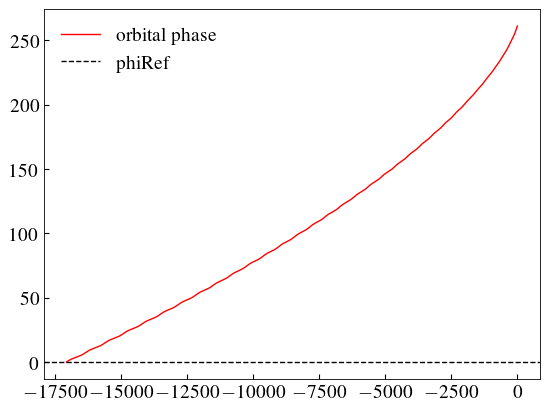

In [52]:
plt.plot(time1/(Mtot*MTSUN_SI),phi.data.data,'r',label='orbital phase')
plt.axhline(y=0,color='k',ls='--',label='phiRef')
plt.legend()
print(phi.data.length)

In [53]:
print(phi.deltaT)

0.00048828125


In [54]:
omega=(np.gradient(phi.data.data))/phi.deltaT
freq=omega/(2*PI)

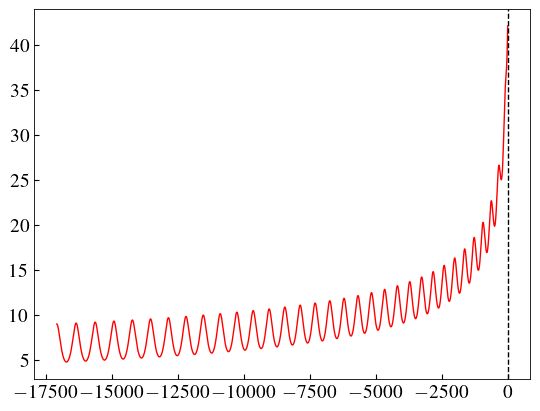

In [55]:
plt.plot(time1/(Mtot*MTSUN_SI),freq,'r',label='orbital frequency')
plt.axvline(x=time1[idx],color='k',ls='--',label='ref_time')

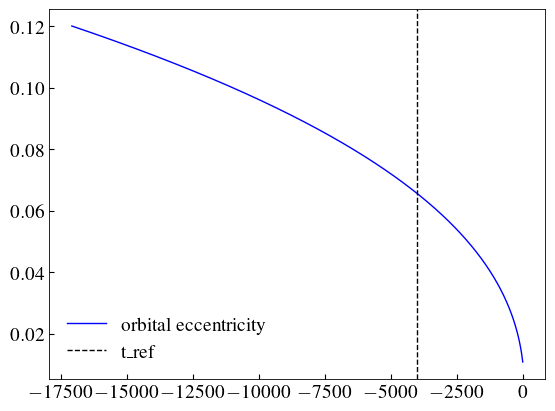

In [60]:
plt.plot(time1/(Mtot*MTSUN_SI),et.data.data,'b',label='orbital eccentricity')
#plt.axhline(y=et.data.data[idx],color='k',ls='--',label='e_ref')
plt.axvline(x=-4000,color='k',ls='--',label='t_ref')
plt.legend()